### The following notebook accomplishes the following things:
1. Extracts the results from the observations file 
2. Creates the input file for initial conditions based on the spinup observations

In [1]:
%matplotlib inline
import sys,os
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import h5py
import pandas as pd

#### 1. Extracts the results from the observations file 

In [19]:
# Reading the csv file 
df_observation = pd.read_csv('spinup_30yrs.demo/observations.dat', skiprows=88, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid,time [days]
time [days],,,,,,,,,,,,,,,,
0.0,0.0,265.150000,265.150000,265.150000,265.150000,265.150000,265.150000,265.150000,0.225770,0.225770,0.225770,0.204735,0.204735,0.204735,0.204735,0.0
1.0,86400.0,265.150000,265.150000,265.150000,265.150000,265.150000,265.150000,265.150000,0.225770,0.225770,0.225770,0.204735,0.204735,0.204735,0.204735,1.0
2.0,172800.0,265.150000,265.150000,265.150000,265.150000,265.150000,265.150000,265.150000,0.225770,0.225770,0.225770,0.204735,0.204735,0.204735,0.204735,2.0
3.0,259200.0,265.150000,265.150000,265.150000,265.150000,265.150000,265.150000,265.150000,0.225770,0.225770,0.225770,0.204735,0.204735,0.204735,0.204735,3.0
4.0,345600.0,265.150000,265.150000,265.150000,265.150000,265.150000,265.150000,265.150000,0.225770,0.225770,0.225770,0.204735,0.204735,0.204735,0.204735,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10953.0,946339200.0,264.662009,264.661990,264.661954,264.661905,264.661715,264.661416,264.661027,0.225769,0.225769,0.225769,0.204734,0.204734,0.204734,0.204734,10953.0
10954.0,946425600.0,264.661943,264.661925,264.661888,264.661839,264.661649,264.661351,264.660962,0.225769,0.225769,0.225769,0.204734,0.204734,0.204734,0.204734,10954.0
10955.0,946512000.0,264.661878,264.661859,264.661822,264.661773,264.661583,264.661285,264.660896,0.225769,0.225769,0.225769,0.204734,0.204734,0.204734,0.204734,10955.0


In [17]:
# Reading the csv file 
df_observation = pd.read_csv('spinup.demo/observations.dat', skiprows=88, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid,time [days]
time [days],,,,,,,,,,,,,,,,
0.0,0.000000e+00,270.15,270.15,270.15,270.15,270.15,270.15,270.15,0.225802,0.225802,0.225802,0.204746,0.204746,0.204746,0.204746,0.0
1.0,8.640000e+04,270.15,270.15,270.15,270.15,270.15,270.15,270.15,0.225802,0.225802,0.225802,0.204746,0.204746,0.204746,0.204746,1.0
2.0,1.728000e+05,270.15,270.15,270.15,270.15,270.15,270.15,270.15,0.225802,0.225802,0.225802,0.204746,0.204746,0.204746,0.204746,2.0
3.0,2.592000e+05,270.15,270.15,270.15,270.15,270.15,270.15,270.15,0.225802,0.225802,0.225802,0.204746,0.204746,0.204746,0.204746,3.0
4.0,3.456000e+05,270.15,270.15,270.15,270.15,270.15,270.15,270.15,0.225802,0.225802,0.225802,0.204746,0.204746,0.204746,0.204746,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365246.0,3.155725e+10,264.15,264.15,264.15,264.15,264.15,264.15,264.15,0.225768,0.225768,0.225768,0.204734,0.204734,0.204734,0.204734,365246.0
365247.0,3.155734e+10,264.15,264.15,264.15,264.15,264.15,264.15,264.15,0.225768,0.225768,0.225768,0.204734,0.204734,0.204734,0.204734,365247.0
365248.0,3.155743e+10,264.15,264.15,264.15,264.15,264.15,264.15,264.15,0.225768,0.225768,0.225768,0.204734,0.204734,0.204734,0.204734,365248.0


#### Plotting the values 
##### 1. Subsurface temperature

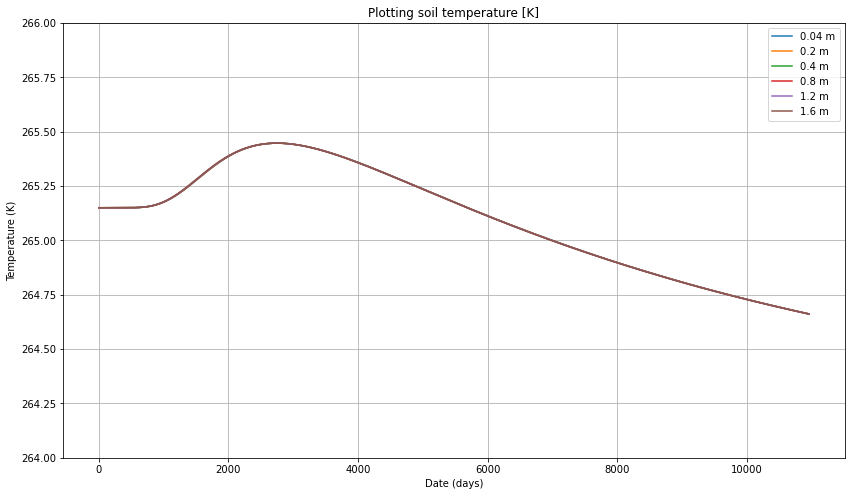

In [20]:
plt.figure(figsize=(14,8))
plt.title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
plt.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
plt.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
plt.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
plt.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
plt.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
plt.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')

plt.ylabel('Temperature (K)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.ylim(264,266)
plt.grid(True)

#### Plotting the values 
##### 2. Saturation of liquid

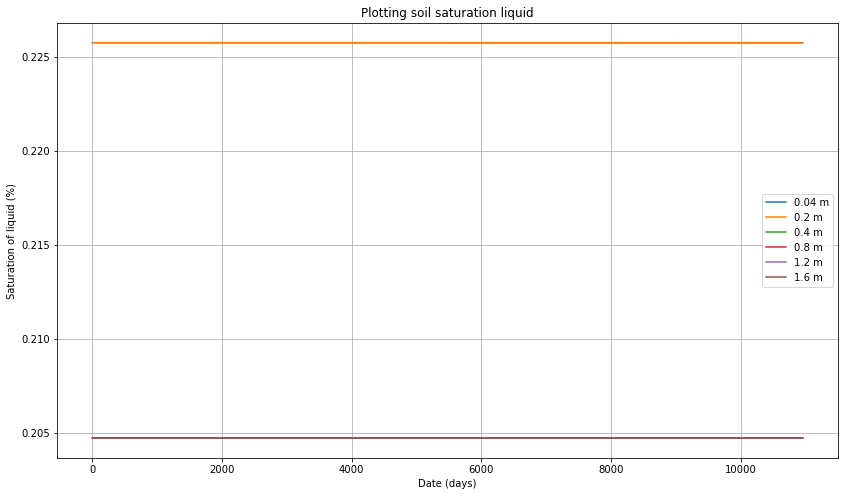

In [16]:
plt.figure(figsize=(14,8))
plt.title('Plotting soil saturation liquid')
#plt.plot(df_observation['point -0.01 saturation liquid'],label='0.01 m')
plt.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
plt.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
plt.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
plt.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
plt.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
plt.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')

plt.ylabel('Saturation of liquid (%)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

#### The final checkpoint file - checkpoint_final.h5 is used as initial condition for Dynamic spinup